## Predicting Career Length of NBA Players

## Problem Statement

We are trying to predict the career length of a NBA player i.e. whether an NBA player will play for next 5 years?

## Business Case 

By using a predictive model like this to identify which players are likely to play for at least 5 years, NBA teams can make more informed decisions about which players to draft, sign, or trade. This can help teams avoid selecting or acquiring players who are more likely to retire early or suffer from career-ending injuries.

NBA teams often have limited resources to acquire players, so it's important to make every signing or trade count. By using a predictive model to identify players who are likely to play for at least 5 years, teams can focus their resources on those players and avoid wasting resources on players who are more likely to retire early or suffer from career-ending injuries.



## 1.0 Setup

In [77]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# set random seed to ensure that results are repeatable
np.random.seed(1)

## 1.1 Data set Description

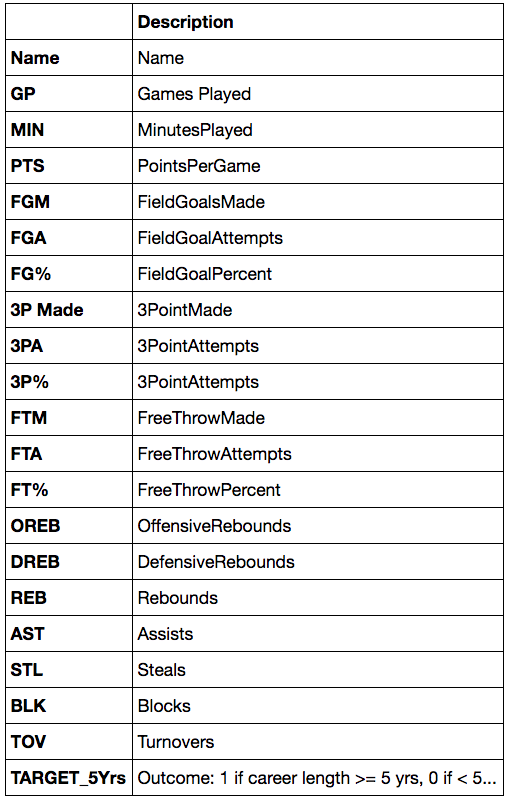

## 2.0 Load Data

In [78]:
# load data

data = pd.read_csv("C:/Users/risha/OneDrive/Desktop/nba_logreg.csv")

data.head(3)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0


## 3.0 Exploratory Data Analysis

In [79]:
# generate a basic summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [80]:
# generate a statistical summary of the numeric value in the data
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


array([[<AxesSubplot:title={'center':'GP'}>,
        <AxesSubplot:title={'center':'MIN'}>,
        <AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'FGM'}>],
       [<AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>,
        <AxesSubplot:title={'center':'3P Made'}>,
        <AxesSubplot:title={'center':'3PA'}>],
       [<AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'FTM'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>],
       [<AxesSubplot:title={'center':'OREB'}>,
        <AxesSubplot:title={'center':'DREB'}>,
        <AxesSubplot:title={'center':'REB'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'TOV'}>,
        <AxesSubplot:title={'center':'TARGET_5Yrs'}>]], dtype=object)

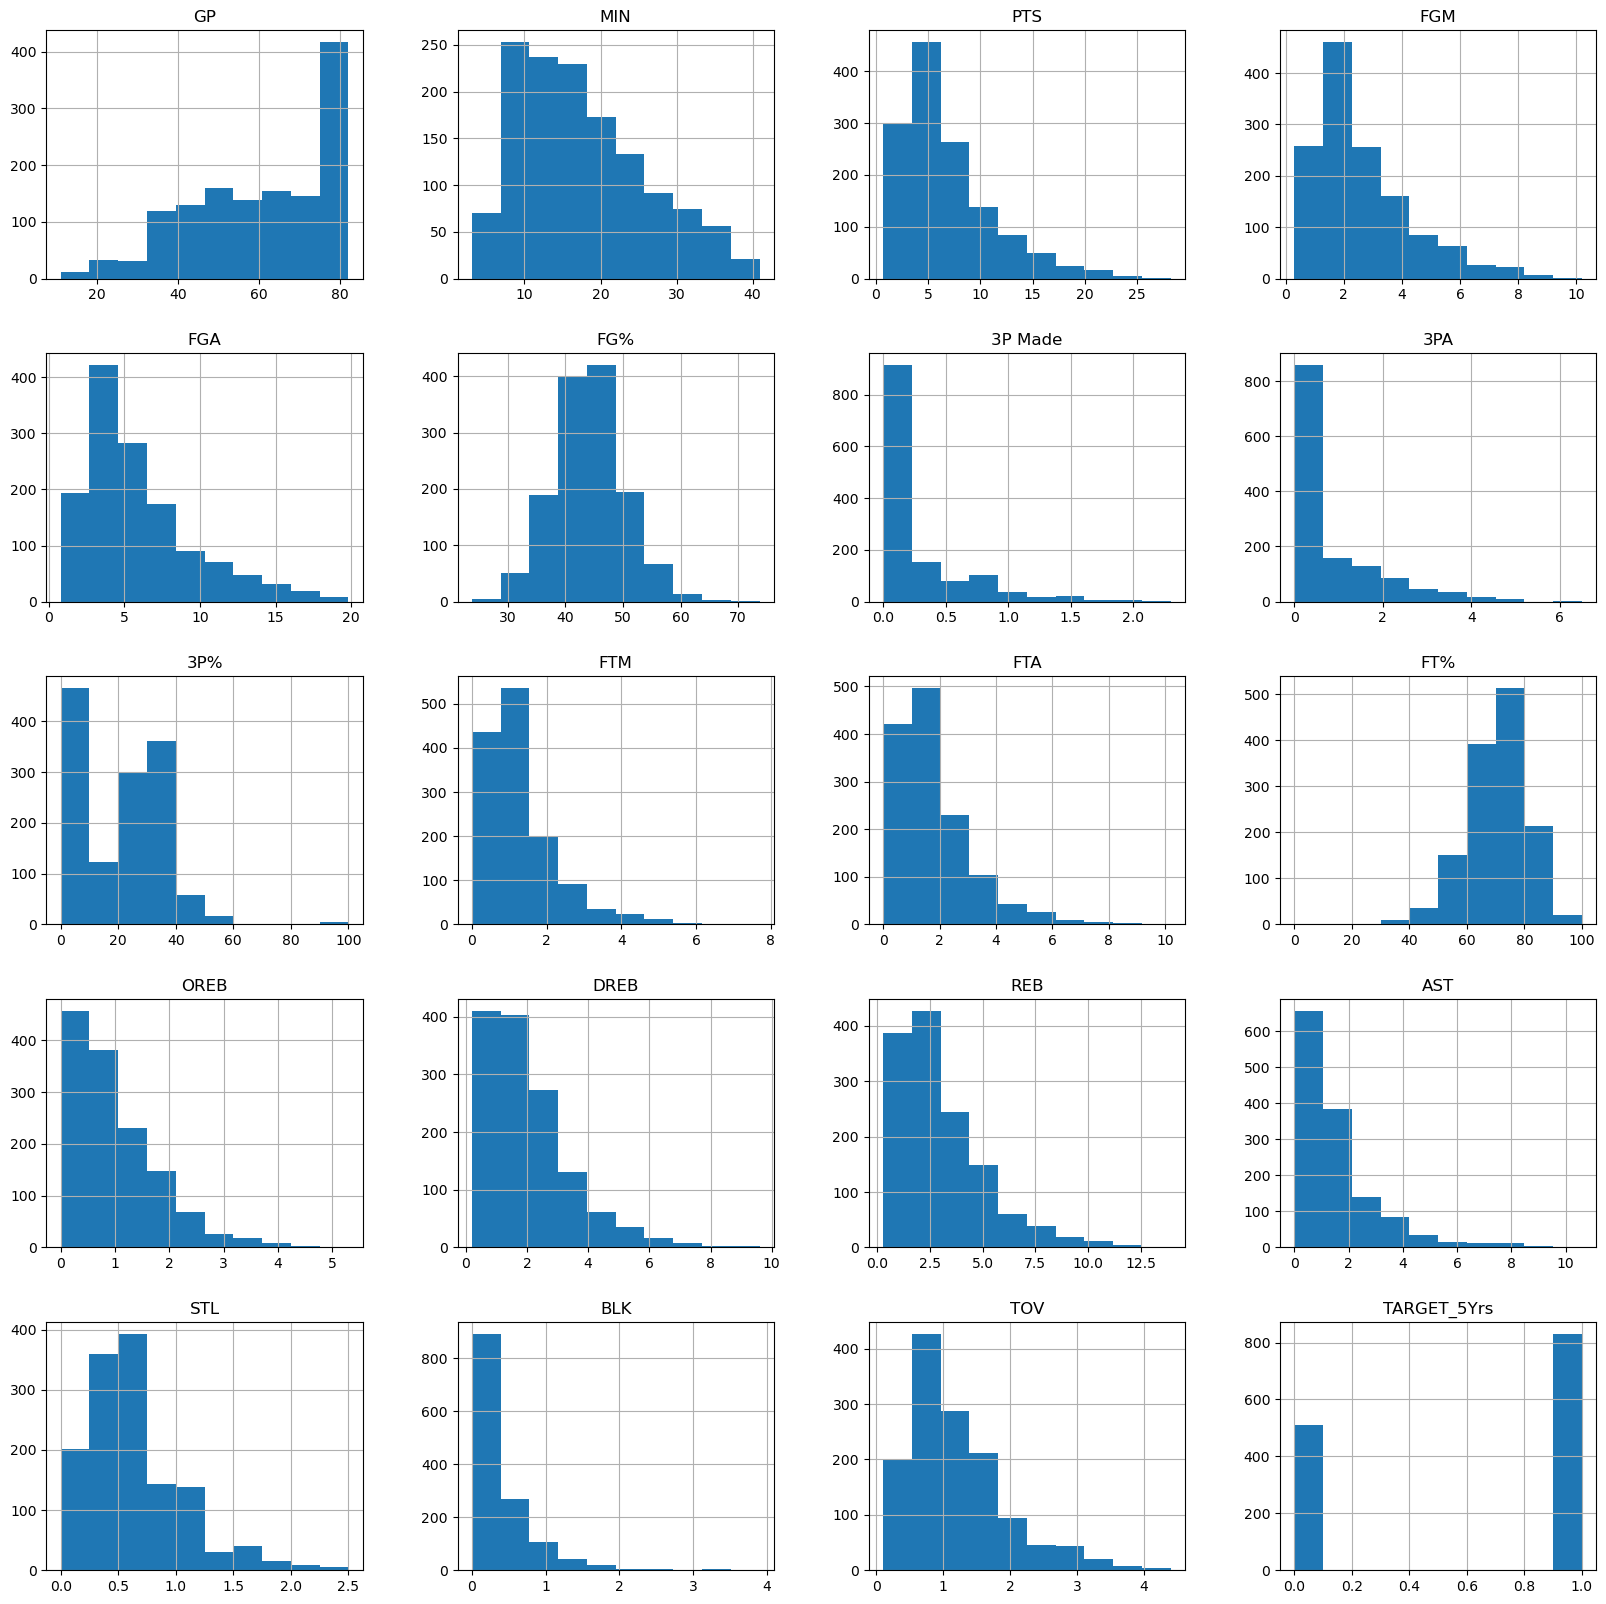

In [81]:
data.hist(figsize=(20,20))

In [82]:
# Check the missing values by summing the total na's for each variable
data.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

### As we can see that there are 11 missing values in 3P% column, so we analyze and impute  the missing values

In [58]:
# finding the indexes of all the null values in 3P% column
np.where(data['3P%'].isnull())[0]

array([338, 339, 340, 358, 386, 397, 507, 509, 510, 521, 559], dtype=int64)

In [59]:
#exploring the rows with null values using the index of null values in 3P% column
data.iloc[[338,339, 340, 358, 386, 397, 507, 509, 510, 521, 559],[7,8,9]]

,3P Made,3PA,3P%
338,0.0,0.0,NaN
339,0.0,0.0,NaN
340,0.0,0.0,NaN
358,0.0,0.0,NaN
386,0.0,0.0,NaN
397,0.0,0.0,NaN
507,0.0,0.0,NaN
509,0.0,0.0,NaN
510,0.0,0.0,NaN
521,0.0,0.0,NaN


Since, 3P% is the percentage of 3 pointers made which is calculated using the formula: 3P made/3P attempt(3PA) 
After careful observation of all the null values, we can see that 3P% column only have null values for players where 3P attempt and 3P made is 0. 
So, by the formula: 3P%= 3P Made/3P attempt, if we put 0 in place of 3P made and 3P attempt. Therefore, the 3P % will also be 0 in these cases
Hence, we impute the missing values with 0

In [60]:
#Replacing the null values with 0 in 3P% column

data['3P%'] = data['3P%'].fillna(0)

In [61]:
data.isna().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [57]:
# create a list of these catagorical variables
category_var_list = list(data.select_dtypes(include='object').columns)
category_var_list

['Name']

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1340 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [63]:
data.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.037133,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
MIN,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.168070,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
PTS,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.154955,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
FGM,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.122542,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
FGA,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.201186,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
FG%,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.336502,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3P Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.591733,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3PA,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.584853,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3P%,0.037133,0.168070,0.154955,0.122542,0.201186,-0.336502,0.591733,0.584853,1.000000,0.036245,-0.027249,0.332458,-0.289399,-0.125716,-0.193082,0.266898,0.198237,-0.246358,0.111495,-0.000004
FTM,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.036245,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


#### Since, 3P% is caluclated by the formula using 3P made and 3P attempt(3PA), we can only take 3P% as the predictor and drop 3P made and 3P attempt. 
#### Similiarly,  FG% is the Field Goal Percentage which is calculated using FG made(FGM) and FG attempt(FGA). Also, FT% is the Field Throw percentage which is calculated using FT made(FTM) and FT attempt(FTA).  Therefore, we can only take FG% and FT% and drop FGM, FGA, FTM, FTA.
#### Also, rebound column is the sum of offensive and defensive rebounds. So, for our models we will only take rebound and drop offensive and defensive rebounds

In [64]:
data.drop(['3P Made','3PA','FGM','FGA','FTM','FTA','OREB','DREB'], axis=1, inplace = True)

#### Since, name also doesn't have any significant impact on the career length therefore, we will drop the name column as well

In [65]:
data.drop('Name',axis=1,inplace=True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1340 non-null   int64  
 1   MIN          1340 non-null   float64
 2   PTS          1340 non-null   float64
 3   FG%          1340 non-null   float64
 4   3P%          1340 non-null   float64
 5   FT%          1340 non-null   float64
 6   REB          1340 non-null   float64
 7   AST          1340 non-null   float64
 8   STL          1340 non-null   float64
 9   BLK          1340 non-null   float64
 10  TOV          1340 non-null   float64
 11  TARGET_5Yrs  1340 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 125.8 KB


## 4.0 Split Data (train/test)

In [67]:
# split the data into validation and training set
train_df, test_df = train_test_split(data, test_size=0.3)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'TARGET_5Yrs'
predictors = list(data.columns)
predictors.remove(target)

## 4.1 Standardization of numeric variables

In [68]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['GP','MIN','PTS','FG%','3P%','FT%','REB','AST','STL','BLK','TOV']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array


test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object


## 4.2 Checking Data Imbalance

In [69]:
train_df[target].value_counts()

1    585
0    353
Name: TARGET_5Yrs, dtype: int64

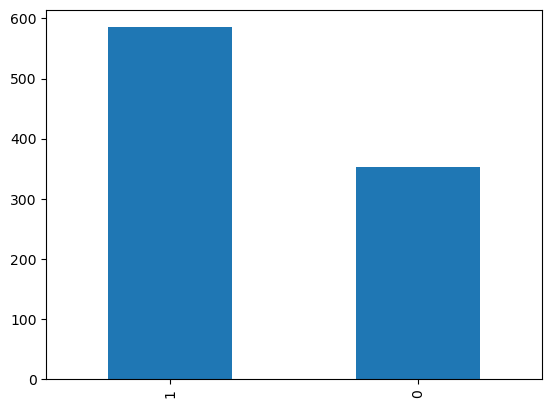

In [70]:
count=train_df[target].value_counts()
count.plot.bar()
plt.show()

#### As we can see from the above graph, there is an imbalance in our data, So, we will balance the data using oversampling technique. Since, we already have less amount of data or rows that is why I did not choose undersampling. 

In [21]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [71]:
#applying oversampling technique to balance the data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

X_train,y_train  = oversample.fit_resample(train_df[predictors], train_df[target])

y_train.value_counts()

1    585
0    585
Name: TARGET_5Yrs, dtype: int64

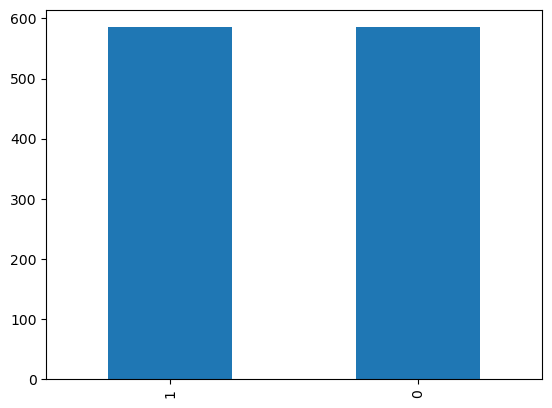

In [72]:
count=y_train.value_counts()
count.plot.bar()
plt.show()

#### The above graph clearly depicts that the data is perfectly balanced.

## 5.0 Save the data

In [73]:
train_X = X_train
train_y = y_train # train_target is now a series objecttrain_df.to_csv('airbnb_train_df.csv', index=False)
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

train_df.to_csv('./train_df.csv', index=False)
train_X.to_csv('./train_X.csv', index=False)
train_y.to_csv('./train_y.csv', index=False)
test_df.to_csv('./test_df.csv', index=False)
test_X.to_csv('./test_X.csv', index=False)
test_y.to_csv('./test_y.csv', index=False)